# SUPERVISED MACHINE LEARNING:
# ANÁLISE DE REGRESSÃO SIMPLES E MÚLTIPLA

UNIVERSIDADE DE SÃO PAULO

MBA DATA SCIENCE & ANALYTICS

Prof. Dr. Luiz Paulo Fávero

coding: utf-8

In [28]:
# Instalação dos pacotes.

# !pip install pandas
# !pip install numpy
# !pip install -U seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install scipy
# !pip install statsmodels
# !pip install scikit-learn
# !pip install pingouin
# !pip install emojis
# !pip install statstests

In [29]:
# Importação dos pacotes.

import pandas as pd # manipulação de dados em formato de dataframe.
import numpy as np # operações matemáticas.
import seaborn as sns # visualização gráfica.
import matplotlib.pyplot as plt # visualização gráfica.
import plotly.graph_objects as go # gráficos 3D.
from scipy.stats import pearsonr # correlações de Pearson.
import statsmodels.api as sm # estimação de modelos.
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos.
from sklearn.preprocessing import LabelEncoder # transformação de dados.
import pingouin as pg # outro modo para obtenção de matrizes de correlações.
import emojis # inserção de emojis em gráficos.
from statstests.process import stepwise # procedimento Stepwise.
from statstests.tests import shapiro_francia # teste de Shapiro-Francia.
from scipy.stats import boxcox # transformação de Box-Cox.
from scipy.stats import norm # para plotagem da curva normal.
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'.
import urllib.request
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

## REGRESSÃO LINEAR SIMPLES

In [30]:
# Carregamento da base de dados.

url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/main/An%C3%A1lise%20de%20Regress%C3%A3o%20Simples%20e%20M%C3%BAltipla/tempodist.csv'

df_tempodist = pd.read_csv(url, delimiter=',')
df_tempodist

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [31]:
# Características das variáveis do dataset.
df_tempodist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [32]:
# Estatísticas univariadas.
df_tempodist.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

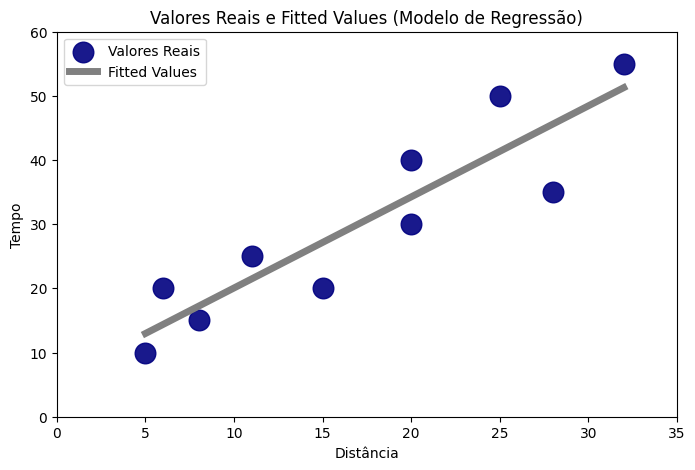

In [33]:
#  Gráfico de dispersão com o ajuste linear (fitted values de um modelo de regressão) que se adequa às observações.

plt.figure(figsize=(8,5))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=False,
            scatter_kws={"color":'navy', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Valores Reais e Fitted Values (Modelo de Regressão)', fontsize=12)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=10, loc='upper left')
plt.show

In [34]:
# Estimação do modelo de regressão linear simples.
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()

# Observação dos parâmetros resultantes da estimação.
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           0.000314
Time:                        21:24:09   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Salvando fitted values (variável yhat) e residuals (variável erro).
#no dataset

df_tempodist['yhat'] = modelo.fittedvalues
df_tempodist['erro'] = modelo.resid
df_tempodist

,tempo,distancia,yhat,erro
0,15,8,17.229730,-2.229730
1,20,6,14.391892,5.608108
2,20,15,27.162162,-7.162162
3,40,20,34.256757,5.743243
4,50,25,41.351351,8.648649
5,25,11,21.486486,3.513514
6,10,5,12.972973,-2.972973
7,55,32,51.283784,3.716216
8,35,28,45.608108,-10.608108
9,30,20,34.256757,-4.256757


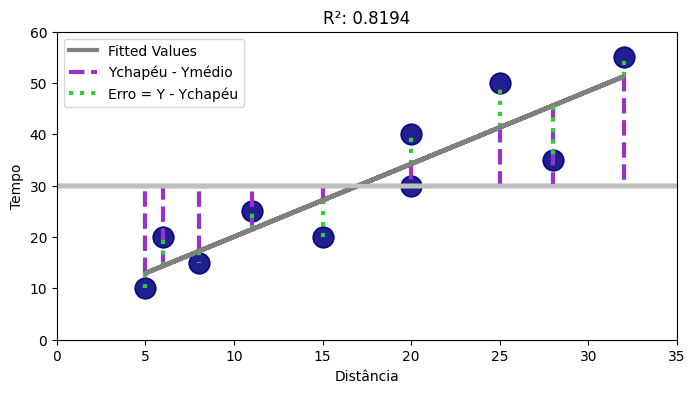

In [36]:
# Gráfico didático para visualizar o conceito de R².

plt.figure(figsize=(8,4))
y = df_tempodist['tempo']
yhat = df_tempodist['yhat']
x = df_tempodist['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot(x, yhat, color='grey', linewidth=3)
    plt.plot([x[i], x[i]], [yhat[i], mean[i]], '--', color='darkorchid', linewidth=3)
    plt.plot([x[i], x[i]], [yhat[i], y[i]],':', color='limegreen', linewidth=3)
    plt.scatter(x, y, color='navy', s=220, alpha=0.2)
    plt.axhline(y = y.mean(), color = 'silver', linestyle = '-', linewidth=3)
    plt.title('R²: ' + str(round(modelo.rsquared, 4)), fontsize=12)
    plt.xlabel('Distância', fontsize=10)
    plt.ylabel('Tempo', fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(0, 35)
    plt.ylim(0, 60)
    plt.legend(['Fitted Values', 'Ychapéu - Ymédio', 'Erro = Y - Ychapéu'],
               fontsize=10, loc='upper left')
plt.show()

In [37]:
# Cálculo manual do R².

R2 = ((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()/(((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()+
       (df_tempodist['erro']**2).sum())

round(R2,4)

0.8194

### Coeficiente de ajuste (R²) é a correlação ao quadrado.

In [38]:
# Correlação de Pearson.
df_tempodist[['tempo','distancia']].corr()

,tempo,distancia
tempo,1.000000,0.905221
distancia,0.905221,1.000000


In [39]:
# R².
(df_tempodist[['tempo','distancia']].corr())**2

,tempo,distancia
tempo,1.000000,0.819426
distancia,0.819426,1.000000


In [40]:
# R² de maneira direta.
modelo.rsquared

0.8194256756756757

                            OLS Regression Results                            
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.598e+31
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.72e-122
Time:                        21:24:11   Log-Likelihood:                 309.16
No. Observations:                  10   AIC:                            -614.3
Df Residuals:                       8   BIC:                            -613.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784   6.83e-15   8.61e+14      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

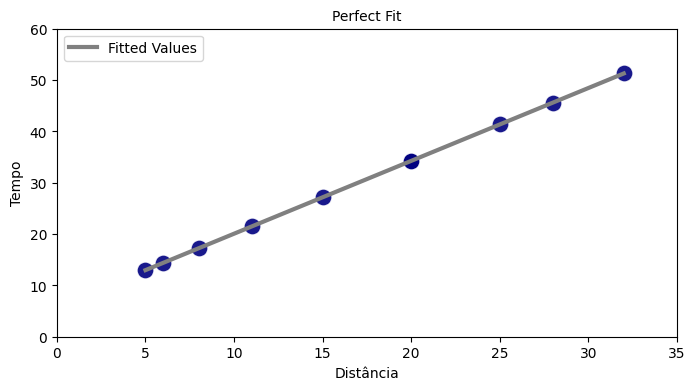

In [41]:
# Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos).

# Estimação do modelo com yhat como variável dependente resultará em um modelo com R² igual a 100%.
modelo_auxiliar = sm.OLS.from_formula('yhat ~ distancia', df_tempodist).fit()

# Parâmetros resultantes da estimação deste modelo didático.
print(modelo_auxiliar.summary())

# Gráfico mostrando o perfect fit.

plt.figure(figsize=(8,4))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=150)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('Perfect Fit', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

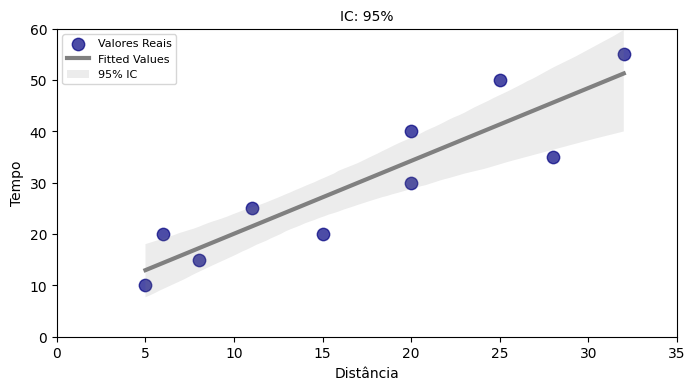

In [42]:
# Gráfico com intervalo de confiança de 95%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 95%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'], fontsize=8, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

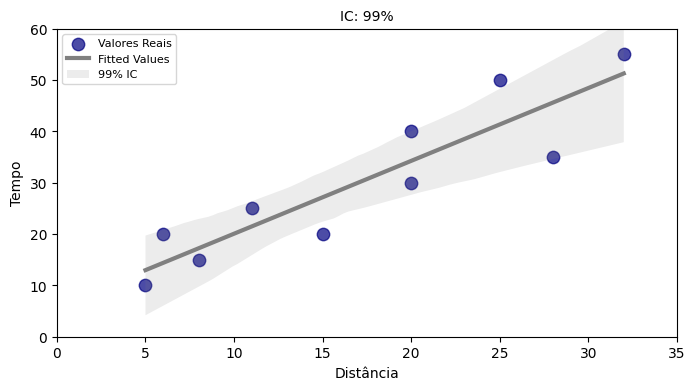

In [43]:
# Gráfico com intervalo de confiança de 99%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 99%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99% IC'],
           fontsize=8, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

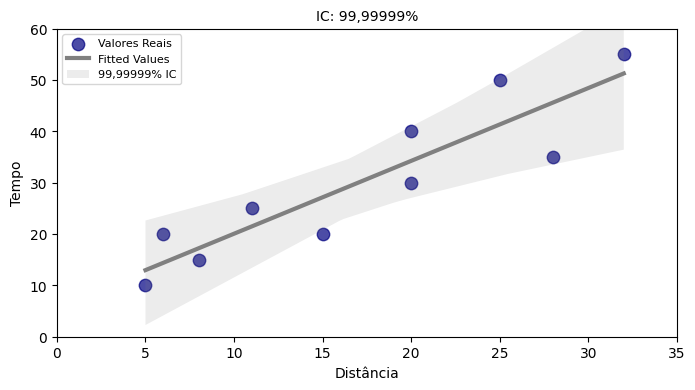

In [44]:
# Gráfico com intervalo de confiança de 99,99999%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99.99999,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 99,99999%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99,99999% IC'],
           fontsize=8, loc='upper left')
plt.show

In [45]:
# Calculando os intervalos de confiança.

# Nível de significância de 10% / Nível de confiança de 90%.
print(modelo.conf_int(alpha=0.1),"\n")

# Nível de significância de 5% / Nível de confiança de 95%.
print(modelo.conf_int(alpha=0.05),"\n")

# Nível de significância de 1% / Nível de confiança de 99%.
print(modelo.conf_int(alpha=0.01),"\n")

# Nível de significância de 0,00001% / Nível de confiança de 99,99999%.
print(modelo.conf_int(alpha=0.0000001))

                  0          1
Intercept -2.549702  14.306459
distancia  0.981001   1.856837 

                  0          1
Intercept -4.573188  16.329944
distancia  0.875861   1.961977 

                  0          1
Intercept -9.329336  21.086093
distancia  0.628735   2.209103 

                   0          1
Intercept -74.960201  86.716957
distancia  -2.781409   5.619247


In [46]:
# Fazendo predições em modelos OLS.

# Ex.: Qual seria o tempo gasto, em média, para percorrer a distância de 25km?
# Cálculo manual
print(5.8784 + 1.4189*(25))

# Cálculo utilizando os próprios parâmetros estimados do modelo.
print(round(modelo.params[0] + modelo.params[1]*(25),4))

41.3509
41.3514


In [47]:
# Maneira direta utilizando a função 'DataFrame' do pacote 'pandas' dentro da função 'predict'.
modelo.predict(pd.DataFrame({'distancia':[25]}))

0    41.351351
dtype: float64

In [48]:
# Nova modelagem para o mesmo exemplo, com novo dataset que contém replicações.

# Quantas replicações de cada linha você quer? -> função 'repeat' do 'numpy'
df_replicado = pd.DataFrame(np.repeat(df_tempodist.values, 3, axis=0))
df_replicado.columns = df_tempodist.columns
df_replicado

,tempo,distancia,yhat,erro
0,15.0,8.0,17.229730,-2.229730
1,15.0,8.0,17.229730,-2.229730
2,15.0,8.0,17.229730,-2.229730
3,20.0,6.0,14.391892,5.608108
4,20.0,6.0,14.391892,5.608108
5,20.0,6.0,14.391892,5.608108
6,20.0,15.0,27.162162,-7.162162
7,20.0,15.0,27.162162,-7.162162
8,20.0,15.0,27.162162,-7.162162
9,40.0,20.0,34.256757,5.743243


In [49]:
# Estimação do modelo com valores replicados.
modelo_replicado = sm.OLS.from_formula('tempo ~ distancia', df_replicado).fit()

# Parâmetros do 'modelo_replicado'.
modelo_replicado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           6.42e-12
Time:                        21:24:15   Log-Likelihood:                -96.369
No. Observations:                  30   AIC:                             196.7
Df Residuals:                      28   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      2.423      2.426      0.022       0.916      10.841
distancia      1.4189      0.126     11.272      0.000       1.161       1.677
==============================================================================
Omnibus:                        5.437   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                2.082
Skew:                          -0.262   Prob(JB):                        0.353
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculando os novos intervalos de confiança.

# Nível de significância de 5% / Nível de confiança de 95%.
modelo_replicado.conf_int(alpha=0.05)

,0,1
Intercept,0.915844,10.840913
distancia,1.161068,1.676769


<function matplotlib.pyplot.show(close=None, block=None)>

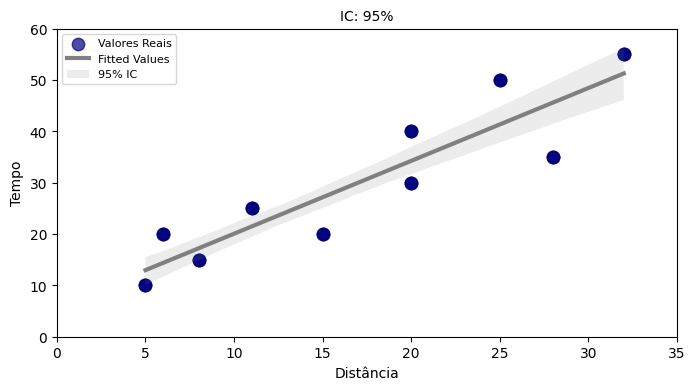

In [51]:
# Plotando o novo gráfico com intervalo de confiança de 95%.
# Note o estreitamento da amplitude dos intervalos de confiança!

plt.figure(figsize=(8,4))
sns.regplot(data=df_replicado, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 95%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'], fontsize=8, loc='upper left')
plt.show

In [52]:
# PROCEDIMENTO ERRADO: ELIMINAR O INTERCEPTO QUANDO ESTE NÃO SE MOSTRAR ESTATISTICAMENTE SIGNIFICANTE.

modelo_errado = sm.OLS.from_formula('tempo ~ 0 + distancia', df_tempodist).fit()

# Parâmetros do 'modelo_errado'.
print(modelo_errado.summary())

# Comparando os parâmetros do modelo inicial (objeto 'modelo') com o 'modelo_errado' pela função 'summary_col' do pacote 'statsmodels.iolib.summary2'.
summary_col([modelo, modelo_errado])

# Outro modo mais completo também pela função 'summary_col'.
summary_col([modelo, modelo_errado],
            model_names=["MODELO INICIAL","MODELO ERRADO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

                                 OLS Regression Results                                
Dep. Variable:                  tempo   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              217.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                    1.31e-07
Time:                        21:24:16   Log-Likelihood:                         -33.077
No. Observations:                  10   AIC:                                      68.15
Df Residuals:                       9   BIC:                                      68.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,MODELO INICIAL,MODELO ERRADO
Intercept,5.8784,
,(4.5323),
distancia,1.4189***,1.6887***
,(0.2355),(0.1145)
R-squared,0.8194,0.9603
R-squared Adj.,0.7969,0.9558
N,10,10


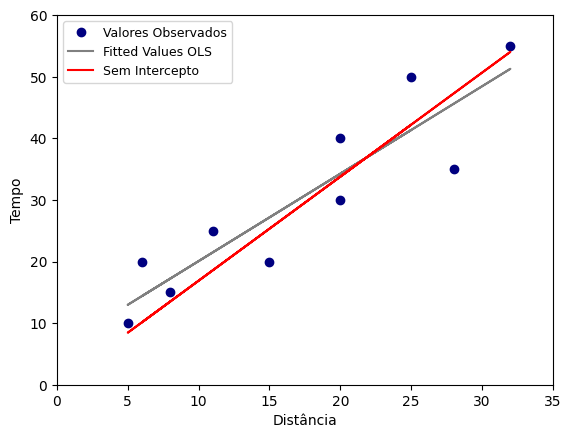

In [53]:
# Gráfico didático para visualizar o viés decorrente de se eliminar erroneamente o intercepto em modelos regressivos.

x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS',
            'Sem Intercepto'], fontsize=9)
plt.show()

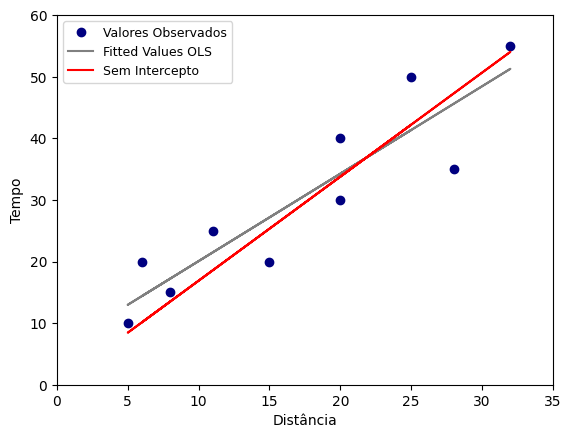

In [55]:
# DÚVIDA: Qual estimação devo escolher?

# Construção do gráfico.
x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS', 'Sem Intercepto'], fontsize=9)

plt.show()

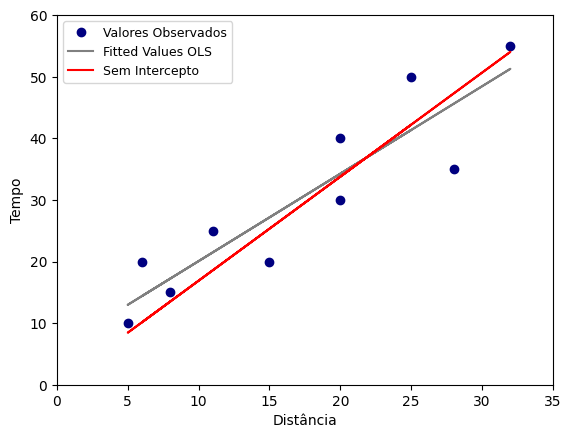

In [56]:
# In[1.25]: DECISÃO: DEVO ESCOLHER O MODELO COM INTERCEPTO!

# Construção do gráfico.
x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS', 'Sem Intercepto'], fontsize=9)

plt.show()